## 1 What is PyTorch?

PyTorch is an open source deep learning framework for Python that was developed mainly by Facebook’s AI research group.

## 2 Why Should We Learn PyTorch?

<ul>
  <li>PyTorch provides a rich library of deep learning models.
  <li>Numpy cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.</li>
    
  <li>PyTorch also provides tools to calculate automatic differentiation. Hence we do not need to mannually calculate the gradients for updating parameter on our neural network model.</li>
</ul>

## 3 PyTorch versions

In [1]:
import torch 
import numpy as np
print(torch.__version__)

2.0.1+cu118


## 4 PyTorch Tensor

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s `ndarrays`, except that tensors can run on GPUs or other specialized hardware to accelerate computing. Tensors are also optimized for automatic differentiation (we’ll see more about that later).

### 4.1 Tensor Initialization
Tensors can be initialized in various ways. Let us take a look at the following examples:
#### 4.1.1 Directly from data
Tensors can be created directly from data. The data type is automatically inferred.

In [2]:
data = [[1, 2],[3, 4]]
# data = (1, 2)
# print(type(data))
x_data = torch.tensor(data)
print(x_data.dtype)

torch.int64


In [3]:
x_data

tensor([[1, 2],
        [3, 4]])

#### 4.1.2 From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print("x_ones:",x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float32) # overrides the datatype of x_data
print("x_rand:",x_rand)

x_ones: tensor([[1, 1],
        [1, 1]])
x_rand: tensor([[0.6753, 0.9933],
        [0.1705, 0.7763]])


### 4.3 Data Types in PyTorch 

8-bit integer (unsigned) `torch.uint8` \
8-bit integer (signed) `torch.int8` \
16-bit integer (signed) `torch.int16` or `torch.short` \
32-bit floating point `torch.float32` or `torch.float` \
64-bit floating point    `torch.float64` or `torch.double` 

[Documentation](https://pytorch.org/docs/stable/tensors.html)

### 4.3 PyTorch Numpy interoperability




#### 4.3.1 NumPy array From a Torch Tensor

In [5]:
t = torch.ones(5)
# print("t:",t)
# print("type(t):",type(t))

n = t.numpy()
print("n:",n)
print("type(n):",type(n))

n: [1. 1. 1. 1. 1.]
type(n): <class 'numpy.ndarray'>


#### 4.3.2 Torch Tensor From a NumPy array

In [6]:
n = np.ones(5)
t = torch.from_numpy(n)

### 4.4 With random or constant values:

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [7]:
shape = (2,3,)#can be list also
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print("Random Tensor:", rand_tensor)
print("Ones Tensor:", ones_tensor)
print("Zeros Tensor:", zeros_tensor)

Random Tensor: tensor([[0.0668, 0.2503, 0.4027],
        [0.6432, 0.2573, 0.8080]])
Ones Tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros Tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 4.5 Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [8]:
tensor = torch.rand(3,4)

print("Shape of tensor:",tensor.shape)
print("Datatype of tensor:",tensor.dtype)
print("Device tensor is stored on:",tensor.device)

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 4.6 Operations on Tensors

Many tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing) and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). 

> **NB** If you're running this notebook on Colab, to enable the GPU support go to `'Edit'->'Notebook settings'` and set `'Hardware accelerator'` to `'GPU'`.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability).


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [10]:
# We move our tensor to the GPU if available

tensor = tensor.to(device)
print("Device tensor is stored on:",tensor.device)

Device tensor is stored on: cuda:0


### 4.7 Standard numpy-like indexing and slicing:

In [11]:
tensor = torch.rand(4, 4)
print(tensor)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])

## Assigning every element in second column to value 0

tensor[:,1] = 0 
print(tensor)

tensor([[0.6039, 0.3689, 0.7573, 0.2495],
        [0.6172, 0.8542, 0.2011, 0.8350],
        [0.8214, 0.3384, 0.8358, 0.5788],
        [0.5938, 0.9506, 0.2194, 0.4083]])
First row:  tensor([0.6039, 0.3689, 0.7573, 0.2495])
First column:  tensor([0.6039, 0.6172, 0.8214, 0.5938])
Last column: tensor([0.2495, 0.8350, 0.5788, 0.4083])
tensor([[0.6039, 0.0000, 0.7573, 0.2495],
        [0.6172, 0.0000, 0.2011, 0.8350],
        [0.8214, 0.0000, 0.8358, 0.5788],
        [0.5938, 0.0000, 0.2194, 0.4083]])


### 4.8 Joining tensors: 
You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
<!-- See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`,
another tensor joining op that is subtly different from ``torch.cat``. -->

In [12]:
tensor = torch.ones(4, 4)
t1 = torch.ones(4, 4)
print(t1.shape)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1.shape)

torch.Size([4, 4])
torch.Size([4, 12])


### 4.9 Arithmetic operations



In [13]:
# This computes the matrix multiplication between two tensors. 
shape = (2,3,)
ones_tensor_1 = torch.ones(shape)
ones_tensor_2 = torch.ones(shape)

#y3 = torch.rand_like(tensor)
y3=torch.matmul(ones_tensor_1, ones_tensor_2.T)

print(y3.shape)


torch.Size([2, 2])


###  4.10 Single-element tensors:
If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [14]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


### 4.11 PyTorch Broad casting

General semantics: Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:


*   If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
*   Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [15]:
# can line up trailing dimensions to make reading easier
# x=torch.ones(5,1,4,1)
# y=torch.ones(3,1,1)
# print((x+y).size())
# # #torch.Size([5, 3, 4, 1])

# but not necessary:
x=torch.ones(1)
y=torch.ones(3,1,7)
print((x+y).size())
#torch.Size([3, 1, 7])

# x=torch.ones(5,2,4,1)
# y=torch.ones(3,1,1)
# print((x+y).size())
# # #RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

torch.Size([3, 1, 7])


## 5 PyTorch Autograd

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{3}\sum_{i=1}^3 \left[(x_i + 2)^2 + 3\right]$$

Let us find the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [16]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [17]:
# u = torch.randint(3, 5, (3,), dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
# print("U", u)

U tensor([4., 4., 4.], requires_grad=True)


Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [18]:
a = x+2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)



Using the statements above, we have created a computation graph that looks similar to the figure below:


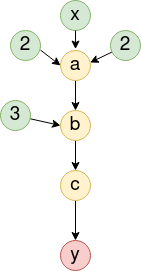

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [19]:
y.backward()

In [20]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [21]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


In [22]:
print(u.grad)

None


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

In [23]:
# external_grad = torch.tensor([1., 1., 1.])
# b.backward(gradient=external_grad)
# print(x.grad)

## An example showing utility of Autograd.

We will use a problem of fitting $$y=\sin(x)$$ with a third order polynomial as our running example. The network will have four parameters, and will be trained with gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output. We need to manually implement the forward and backward passes through the network.
$$y=a + b x + c x^ 2 + d x ^3$$ 

We have a set of data points consisting of independent variables $x_i$ and corresponding observed output $y_i$. The set is represented as $\{(x_0,y_0),(x_1,y_1),(x_2,y_2),\dots(x_N,y_N)\}$. Also, corresponding to each $x_i$ we have a predicted value $y_i^{pred}$.
The error is represented as 
$$\mathcal{L}=\sum_{i=1}^N {(y_i-y^{pred}_i)}^2=\sum_{i=1}^N {(y_i-a - b x_i - c x_i^ 2 - d x_i^3)}^2  $$

$$\frac{\partial\mathcal{L}}{\partial a}=\frac{\partial}{\partial a}\sum_{i=1}^N {(y_i-y^{pred}_i)}^2=-2*\sum_{i=1}^N {(y_i-y^{pred}_i)}$$

$$a^{new}=a^{old}-\eta\frac{\partial\mathcal{L}}{\partial a}$$

$$\frac{\partial\mathcal{L}}{\partial b}=\frac{\partial}{\partial b}\sum_{i=1}^N {(y_i-y^{pred}_i)}^2=-2*\sum_{i=1}^N {x_i*(y_i-y^{pred}_i)}$$

$$b^{new}=b^{old}-\eta\frac{\partial\mathcal{L}}{\partial b}$$


<!-- Actual taylors expansion of $sin(x)$
$$sin(x)=x - \frac{x^3}{3!}  + \frac{x^5}{5!} - \frac{x^7}{7!}+\dots$$  -->

In [26]:
import math


dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)
#print("a",a)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y -y_pred ).pow(2).sum().item()
    if t % 100 == 99:
        print("epoch=",t, "loss=",loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y -y_pred)
    grad_a = (-1)*grad_y_pred.sum()
    grad_b = (-1)*(grad_y_pred * x).sum()
    grad_c = (-1)*(grad_y_pred * x ** 2).sum()
    grad_d = (-1)*(grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

epoch= 99 loss= 441.12701416015625
epoch= 199 loss= 310.9689636230469
epoch= 299 loss= 220.1435546875
epoch= 399 loss= 156.71507263183594
epoch= 499 loss= 112.38798522949219
epoch= 599 loss= 81.38880920410156
epoch= 699 loss= 59.69626235961914
epoch= 799 loss= 44.50689697265625
epoch= 899 loss= 33.86479187011719
epoch= 999 loss= 26.404468536376953
epoch= 1099 loss= 21.171798706054688
epoch= 1199 loss= 17.499732971191406
epoch= 1299 loss= 14.921594619750977
epoch= 1399 loss= 13.110649108886719
epoch= 1499 loss= 11.838059425354004
epoch= 1599 loss= 10.943389892578125
epoch= 1699 loss= 10.314180374145508
epoch= 1799 loss= 9.871498107910156
epoch= 1899 loss= 9.559940338134766
epoch= 1999 loss= 9.340593338012695
Result: y = -0.023479457944631577 + 0.8512952923774719 x + 0.004050595220178366 x^2 + -0.09255580604076385 x^3



In the above examples, we had to manually implement both the forward and backward passes of our model. Manually implementing the backward pass is not a big deal for a small model, but can quickly get very complicated for large complex models.


Here we use PyTorch Tensors and `autograd` to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

In [25]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)


learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y - y_pred).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1166.781494140625
199 801.1495971679688
299 551.5908203125
399 381.0613708496094
499 264.4001159667969
599 184.4993133544922
699 129.71249389648438
799 92.1033706665039
899 66.25664520263672
999 48.473663330078125
1099 36.22513961791992
1199 27.779281616210938
1299 21.9493465423584
1399 17.920801162719727
1499 15.134149551391602
1599 13.204569816589355
1699 11.86716365814209
1799 10.939294815063477
1899 10.294957160949707
1999 9.847097396850586
Result: y = 0.03001800738275051 + 0.8421373963356018 x + -0.005178605206310749 x^2 + -0.09125317633152008 x^3


## References
<ul>
  <li><a href="https://github.com/haofeixu/cs231n/blob/master/assignment2/PyTorch.ipynb">cs231n</a></li>
  <li><a href="https://pytorch.org/tutorials">PyTorch Tutorials</a></li>
  <li><a href="https://github.com/jcjohnson/cnn-benchmarks">CPU GPU speedup comparison</a></li>
  <li><a href="https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html">Computation graph</a></li>
</ul>